In [1]:
import sys
import random
sys.path.append('./e2e')
sys.path.append('./heuristic')
from heuristic.methods import ga,ts,sa,aco
from heuristic.methods.common import parse_env,ruler,random_chromosome,sort_task
import sys
import learn2learn as l2l
import pandas as pd
import numpy as np
from e2e.dataloader import ML_Dataset
from e2e.dataloader import MAML_Dataset
from e2e.model import MLP
from e2e.utils import opts
import torch

INFO: Pandarallel will run on 100 workers.
INFO: Pandarallel will use Memory file system to transfer data between the main process and workers.


### 导入环境

In [2]:
test_dataset = MAML_Dataset(mode='test', path='./env/bob_info.csv')
test_df = test_dataset.test_df
test_df.index=range(len(test_df))
test_df = test_df.head(1)
test_df

,path,class,excel_num,bob,fitness,feature
0,./case4/0.xlsx,4,0,"[[74, 0, 0], [54, 1, 0], [74, 0, 1], [54, 1, 1...",73493.004,"[6.0, 27.0, 51.0, 459.0, 175.5, 18.0, 21.0, 26..."


In [3]:
feature = test_df.iloc[:,-1].values
feature = np.array([list(x) for x in feature],dtype=np.float32)
feature = torch.from_numpy(feature).float()

### 加载模型

In [4]:
models = MLP(756, 256, 450, dropout=0.1)
models.load_state_dict(torch.load('./e2e/checkpoints/new_ep400'))
models.eval()
maml = l2l.algorithms.MAML(models, lr=1e-10)

### 预测产线

In [5]:
y_data_list =  maml(feature).detach().cpu().numpy()
y_data_list = models(feature).detach().cpu().numpy()
predict_order = [ruler(x.reshape(150,3),75) for x in y_data_list][0]  # 产线还原
np.array(predict_order)[:,0]

array([27, 56,  6, 12, 68, 68,  7, 25, 35, 69, 44, 37, 57, 16, 11, 41, 26,
       72, 62, 13, 49, 16, 59,  8, 20, 32, 31, 18, 52, 15, 64, 53, 23, 28,
       50,  2, 70, 27, 72, 56, 62, 14, 22, 71, 35, 73, 12, 23, 10, 42, 43,
       43, 30, 54,  7,  0, 46, 45, 47, 30, 21, 46, 66, 28, 65,  2, 51, 48,
       54,  4, 60, 70, 36,  1, 48, 14, 47, 36, 41, 24, 52, 60, 33, 66, 40,
       25, 58, 24, 40, 38, 10, 37, 29, 49,  9, 19,  5,  4, 71, 39, 67, 19,
       65,  5,  1, 55, 50, 11, 22, 64, 74, 21, 58, 61, 45, 26, 17,  6, 18,
       74, 29, 51, 34, 34, 20, 69,  8, 59, 63, 32, 63,  9, 44, 31, 17, 15,
       33, 53,  3, 13, 61, 73, 38, 67, 42, 57,  3, 55, 39,  0])

### 加载环境对比

In [6]:
env_path = test_df['path'].values[0].replace('./','env/')
env_path

'env/case4/0.xlsx'

In [7]:
J, M, A, D, N, pt, p, W = parse_env(env_path) #解析环境信息
random_order = random_chromosome(J, M) # 随机产线和

### random_order 和 predict_order 对比

In [8]:
predict_record = []
random_record = []

In [9]:
predict_env=([predict_order[:] for _ in range(20)],J,M,W,N,A,D,pt,p)
predict_record.append(ga(predict_env,record = True))
predict_record.append(sa(predict_env,record = True))
predict_record.append(ts(predict_env,record = True))
predict_record.append(aco(predict_env,record = True, max_iterations=500))

73435.128
67688.08499999999
67688.08499999999
67688.08499999999
67219.04999999999
67038.72
66526.746
65753.742
65753.742
65753.742
65753.742
65753.742
65753.742
65753.742
65753.742
65708.586
65271.032999999996
65271.032999999996
65271.032999999996
65271.032999999996
65271.032999999996
65271.032999999996
65271.032999999996
65271.032999999996
65271.032999999996
65271.032999999996
65271.032999999996
65271.032999999996
65271.032999999996
65271.032999999996
65271.032999999996
65271.032999999996
65271.032999999996
65271.032999999996
65271.032999999996
65271.032999999996
65271.032999999996
65271.032999999996
65271.032999999996
64710.642
64710.642
64710.642
64710.642
64710.642
64710.642
64710.642
64710.642
64710.642
64710.642
64710.642
64710.642
64710.642
64710.642
64710.642
64710.642
64710.642
64710.642
64710.642
64710.642
64710.642
64710.642
64710.642
64710.642
64207.922999999995
64207.922999999995
64207.922999999995
64207.922999999995
64207.922999999995
64207.922999999995
64207.922999999995

In [10]:
nums = random.sample(list(range(75))*2,150)
result = sort_task(np.column_stack((nums, np.ones((150, 2), dtype=int))),J).tolist()
random_env=([result[:] for _ in range(20)],J,M,W,N,A,D,pt,p)
random_record.append(ga(random_env,record = True))
random_record.append(sa(random_env,record = True))
random_record.append(ts(random_env,record = True))
random_record.append(aco(random_env,record = True, max_iterations=500))

122611.761
92305.572
85603.28099999999
83185.242
83185.242
83185.242
83185.242
78107.691
78003.384
74898.027
70196.631
70196.631
68484.033
68484.033
68484.033
67768.35
67768.35
67768.35
67768.35
67768.35
67768.35
67768.35
67768.35
67768.35
67768.35
66425.09999999999
66425.09999999999
65661.234
65661.234
65661.234
65661.234
65661.234
65661.234
65661.234
65661.234
65271.636
65271.636
65204.952
65204.952
65204.952
65204.952
64430.523
64316.769
64316.769
64316.769
64316.769
64316.769
64316.769
64316.769
64316.769
64316.769
64316.769
63760.44
63760.44
63760.44
63760.44
63760.44
63760.44
63760.44
63760.44
63760.44
63760.44
63760.44
63760.44
63760.44
63760.44
63760.44
63760.44
63760.44
63760.44
63760.44
63760.44
63760.44
63760.44
63760.44
63760.44
63760.44
63760.44
63760.44
63760.44
63760.44
63760.44
62997.513
62997.513
62997.513
62997.513
62997.513
62997.513
62997.513
62997.513
62997.513
62997.513
62997.513
62997.513
62997.513
62997.513
62997.513
62997.513
62997.513
62997.513
80972.882999999

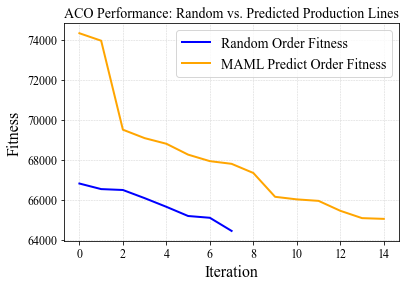

In [14]:
import numpy as np
import matplotlib.pyplot as plt
plt.rc('font',family='Times New Roman')
# 生成随机数据
x = np.arange(0, 400)
y1 = data1['valid_error']
y2 = data['valid_error']
# 计算移动平均值
window_size = 10
window = np.ones(window_size) / float(window_size)
y_smooth = np.convolve(y1, window, 'same')

# 绘图
fig, ax = plt.subplots(figsize=(8, 6))

ax.plot(x, y1, alpha=0.5, color='red', linewidth=2, label='Generalization Valid')
ax.plot(x, y2, alpha=0.5, color='green', linewidth=2, label='Valid')
# 界限线
ax.axhline(y=0, linestyle='--', color='black', linewidth=1)
# 标题和标签
ax.set_title('Generalization loss comparison', fontsize=28)
ax.set_xlabel('Epoch', fontsize=20)
ax.set_ylabel('Loss', fontsize=20)
ax.tick_params(axis='both', which='major', labelsize=12)
# 图例
ax.legend(loc='best', fontsize=24)

plt.show()